In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

In [3]:
def linear_fit(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [4]:
## review linear regression
plant_height = Table.read_table('Plant_height.csv').select('temp', 'loght')

In [5]:
fitted = plant_height.with_column(
    'fitted', 
    linear_fit(plant_height, 0, 1)
)
fitted

temp,loght,fitted
10.8,1.44716,0.232403
24.5,1.42488,0.813469
20.9,-0.522879,0.66078
19.9,0.20412,0.618366
9.7,-0.69897,0.185748
22.6,0.230449,0.732883
16.8,-0.30103,0.486884
27.7,1,0.949193
15.5,1.60206,0.431747
26.4,-0.30103,0.894055


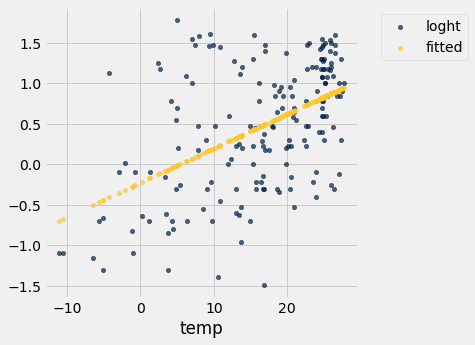

In [6]:
fitted.scatter('temp')

# Squared Error

In [7]:
sample = [[9.7, -0.69897], [25.5, 1.17609], [20.9, -0.522879]]


def graph_errors(slope, intercept):
    print('Slope:    ', np.round(slope, 1), 'height in inches per temp in celsius')
    print('Intercept:', np.round(intercept, 1), 'height in inches')
    plant_height.scatter('temp', 'loght')
    xlims = np.array([-15, 30])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     -0.3 height in inches per temp in celsius
Intercept: -0.9 height in inches


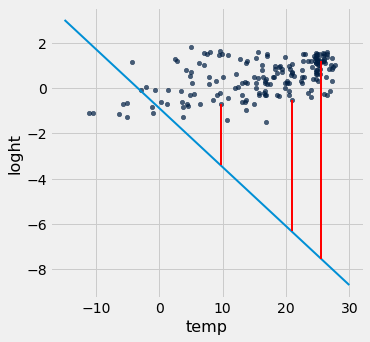

In [8]:
graph_errors(-0.26, -.9)

Slope:     0.0 height in inches per temp in celsius
Intercept: -0.2 height in inches


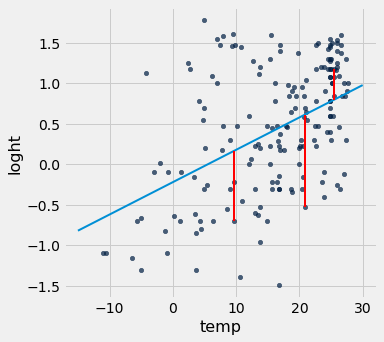

In [9]:
graph_errors(0.04, -0.22)

In [10]:
def find_rmse(slope, intercept):
    ## creating our graph of the data with regression line and error 
    graph_errors(slope, intercept)
    
    ## extract x and y values 
    x = fitted.column('temp')
    y = fitted.column('loght')
    
    ## predict y values 
    predicted = slope * x + intercept 
    
    ## calculate errors 
    errors = y - predicted 
    se = errors ** 2
    mse = np.mean(se)
    rmse = mse ** 0.5
    
    print("Root mean squared error:", rmse)

Slope:     0.1 height in inches per temp in celsius
Intercept: -1 height in inches
Root mean squared error: 0.8756636886405793


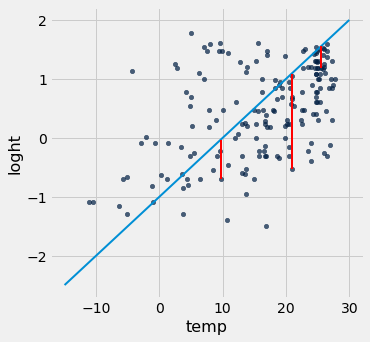

In [11]:
find_rmse(0.1, -1)

Slope:     8 height in inches per temp in celsius
Intercept: 6 height in inches
Root mean squared error: 153.08639856326073


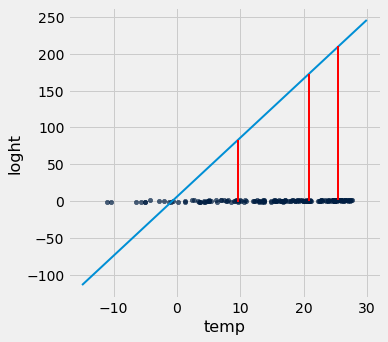

In [12]:
find_rmse(8, 6)

Slope:     0.0 height in inches per temp in celsius
Intercept: -0.2 height in inches
Root mean squared error: 0.6809626399845249


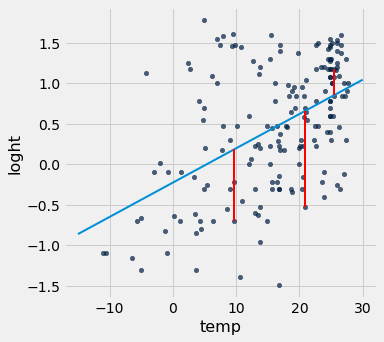

In [13]:
find_rmse(slope(plant_height, 0, 1), intercept(plant_height, 0, 1))

# Least Squares

In [34]:
def find_mse(slope, intercept):
    ## identify variables 
    x = plant_height.column(0)
    y = plant_height.column(1)
    
    ## predict y values  ## y = m x + b  
    predicted =  slope * x + intercept
    
    ## find mse 
    e = y - predicted 
    se = e ** 2
    mse = np.average(se)
    
    return mse

In [35]:
minimize(find_mse)

array([ 0.04443622, -0.25433126])

In [36]:
slope(plant_height, 0, 1)

0.0424136152843201

In [37]:
intercept(plant_height, 0, 1)

-0.22566450772799984